In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_connection

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [13]:
#acquiring appropriate data from wrangle.py
from wrangle import acquire_data

In [17]:
df = acquire_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [20]:
df.fips.unique() # 6 are houses made in cali

array([6037., 6059., 6111.])

In [21]:
#I dropped all the nulls from from bedrooms, bathrooms, and tax_value. 
#I impute the mean value into the null of area, year-built, and taxamount
# most correct way would to impute the mean in the train data set 
#I could have rename the fips to have a better view of the location
from wrangle import clean_and_impute_data
clean_data = clean_and_impute_data(df)
clean_data

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,1862.870784,27516.0,1960.950824,5634.944023,6037.0
1,0.0,0.0,1862.870784,10.0,1960.950824,5634.944023,6037.0
2,0.0,0.0,1862.870784,10.0,1960.950824,5634.944023,6037.0
3,0.0,0.0,1862.870784,2108.0,1960.950824,174.210000,6037.0
4,4.0,2.0,3633.000000,296425.0,2005.000000,6941.390000,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.000000,960756.0,2015.000000,13494.520000,6059.0
2152859,4.0,4.5,3127.000000,536061.0,2014.000000,6244.160000,6059.0
2152860,0.0,0.0,1862.870784,208057.0,1960.950824,5783.880000,6059.0
2152861,3.0,2.5,1974.000000,424353.0,2015.000000,5302.700000,6059.0


#try using this plt.figure(figsize = (11,7))
plt.subplot(121)
sns.histplot(data=train, x='final_grade', bins=10)

plt.subplot(122)  # 1 row and 2 columns
sns.histplot(data=train, x= 'final_grade_mms', bins=10)

plt.show()


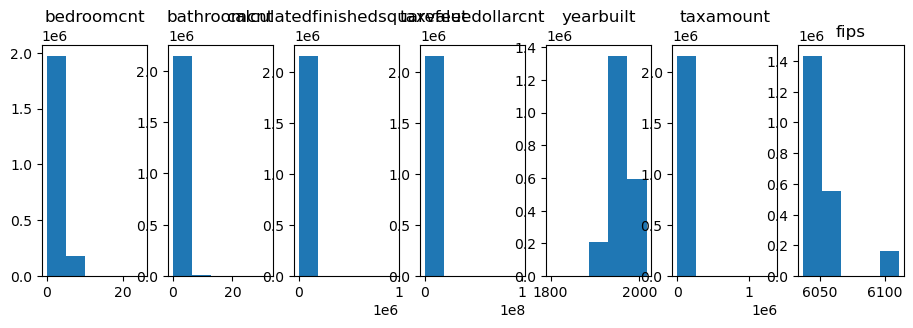

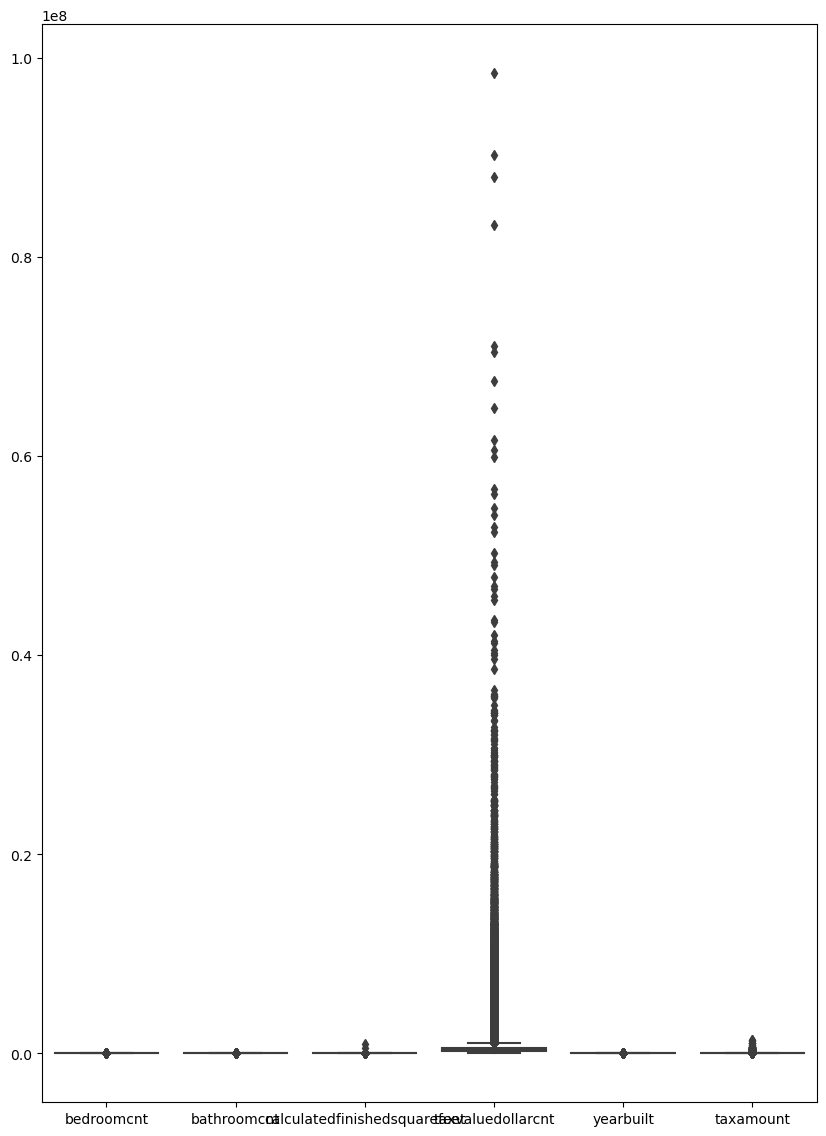

In [12]:
from wrangle import visualize_data
visualize = visualize_data(df)
visualize


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152359 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [14]:
df.shape

(2152359, 7)

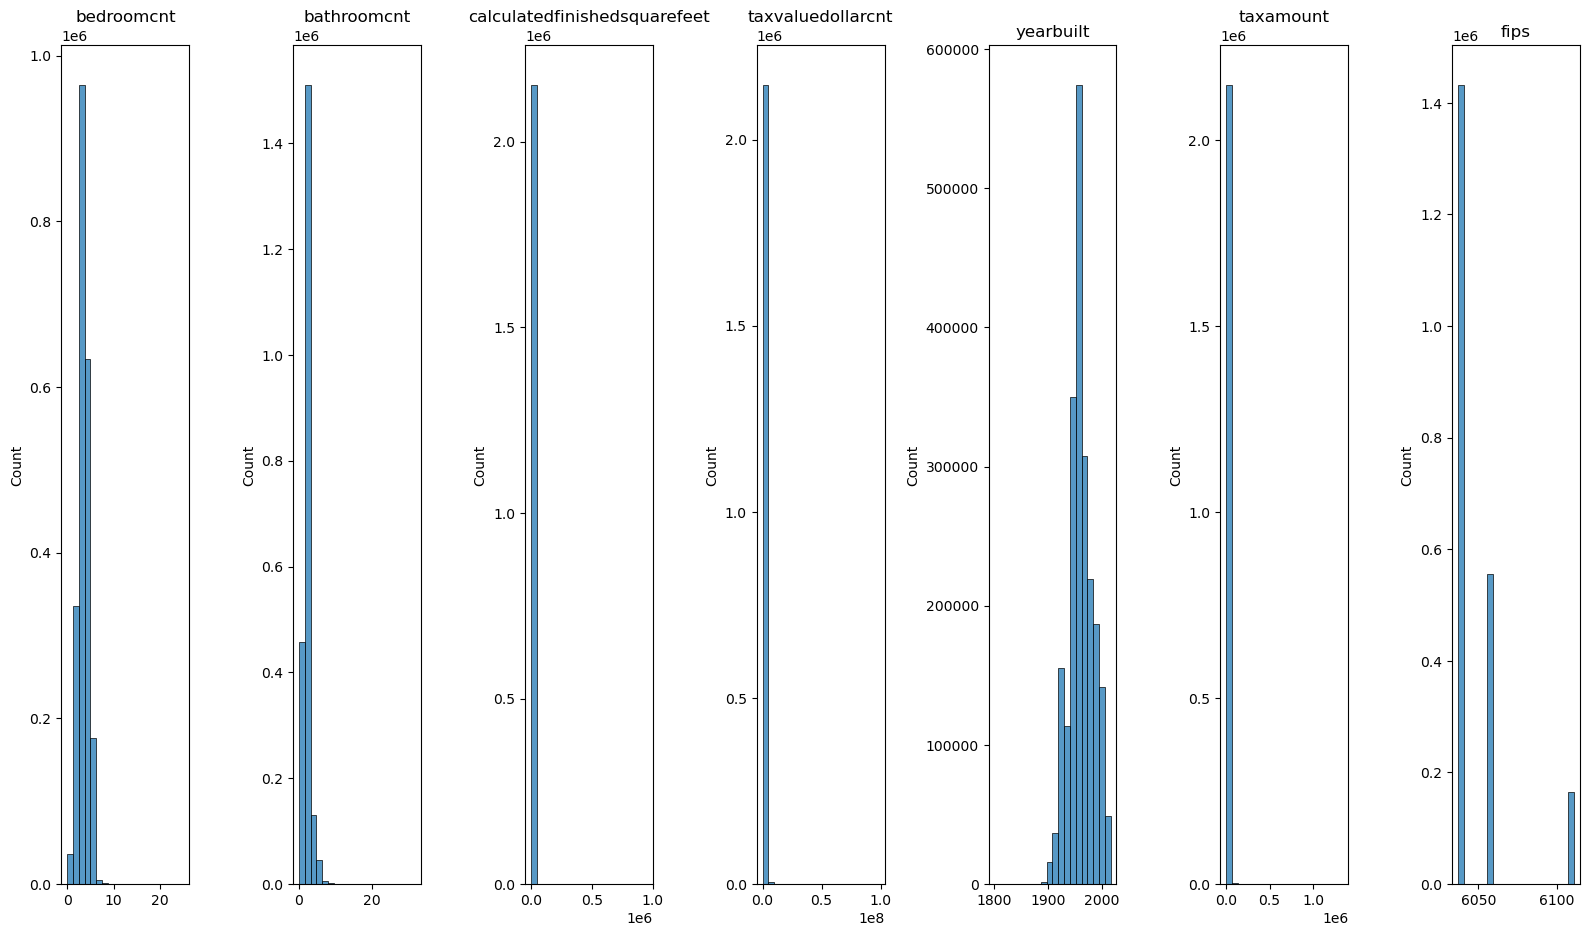

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_columns(df, cols):
    num_cols = len(cols)
    num_rows = 2  # Number of rows for subplots

    # Create subplots with specified number of rows and columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 18))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i, col in enumerate(cols):
        # Create histogram for column and set title
        sns.histplot(data=df, x=col, bins=20, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel("")  # Remove x-axis label for cleaner appearance

    # Remove any extra subplots if needed
    if num_cols < len(axes):
        for ax in axes[num_cols:]:
            ax.remove()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']
plot_columns(df, cols)


In [23]:
#only fit scaling object to train data set
seed = 42

train, val_test = train_test_split(df, train_size = 0.8,
                                  random_state = seed)

val, test = train_test_split(val_test, train_size = 0.5,
                           random_state = seed)

train.shape, val.shape, test.shape

((1721887, 7), (215236, 7), (215236, 7))

In [24]:
mms = MinMaxScaler()

mms.fit(train[['fips']])





MinMaxScaler()

In [26]:
train['fips'] = mms.transform(train[['fips']])
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
768062,2.0,1.0,795.0,202881.0,1950.0,2810.14,0.0
928726,3.0,2.0,1899.0,449134.0,1949.0,5886.96,0.0
1238163,4.0,3.0,2053.0,336483.0,2009.0,4414.58,0.0
1045316,3.0,2.0,939.0,440101.0,1953.0,5371.26,0.0
2026501,3.0,2.0,1312.0,242371.0,1956.0,3069.29,0.0


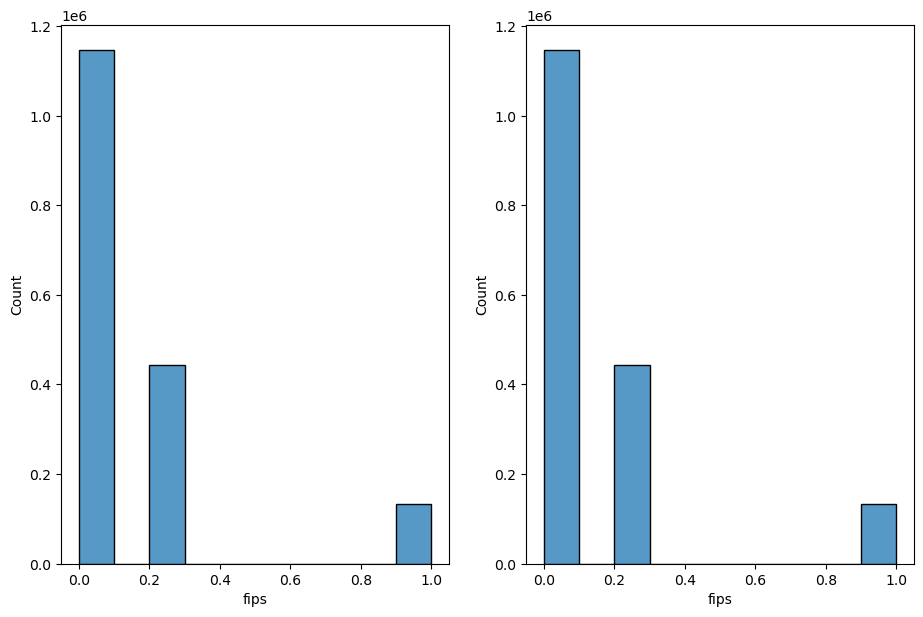

In [28]:
def compare_data(scaled_col, df = train, original='fips'):
    plt.figure(figsize=(11,7))
    
    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=10)

    plt.subplot(122)  # 1 row and 2 columns
    sns.histplot(data=train, x= scaled_col, bins=10)

    plt.show()
    
compare_data('fips')

In [33]:
ss = StandardScaler()
ss.fit(train[['fips']])

train['fips_ss'] = ss.transform(train[['fips']])
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,fips_rs,fips_ss
768062,2.0,1.0,795.0,202881.0,1950.0,2810.14,0.0,0.0,-0.556491
928726,3.0,2.0,1899.0,449134.0,1949.0,5886.96,0.0,0.0,-0.556491
1238163,4.0,3.0,2053.0,336483.0,2009.0,4414.58,0.0,0.0,-0.556491
1045316,3.0,2.0,939.0,440101.0,1953.0,5371.26,0.0,0.0,-0.556491
2026501,3.0,2.0,1312.0,242371.0,1956.0,3069.29,0.0,0.0,-0.556491


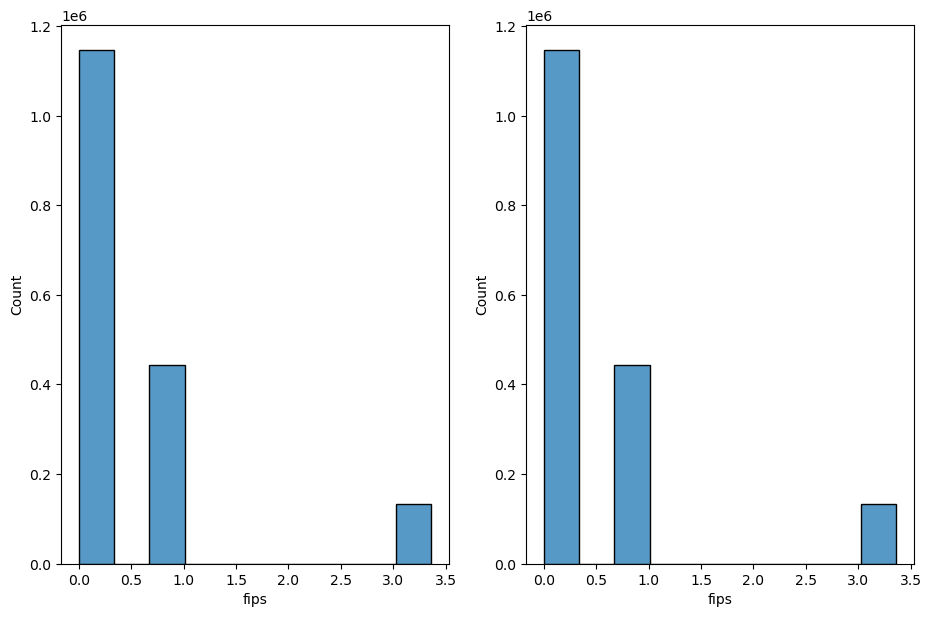

In [34]:
compare_data('fips')

In [35]:
def prepare_zillow_data():
    # Acquire and clean data
    df = acquire_data()
    df_cleaned = clean_and_impute_data(df)

    # Visualize cleaned data
    visualize_data(df_cleaned)

    # Split data into train, validate, and test sets

    # Apply scaling using MinMaxScaler
    df_train_scaled, df_validate_scaled, df_test_scaled = apply_scaling(df_train, df_validate, df_test, MinMaxScaler())

    return df_train_scaled, df_validate_scaled, df_test_scaled

In [36]:
#Create an instance of the RobustScaler object
rs = RobustScaler()

#fit the object to our desired column
rs.fit(train[['fips']])

#transform the features and assign to a new column
train['fips_rs'] = rs.transform(train[['fips']])

#did it work
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,fips_rs,fips_ss
768062,2.0,1.0,795.0,202881.0,1950.0,2810.14,0.0,0.0,-0.556491
928726,3.0,2.0,1899.0,449134.0,1949.0,5886.96,0.0,0.0,-0.556491
1238163,4.0,3.0,2053.0,336483.0,2009.0,4414.58,0.0,0.0,-0.556491
1045316,3.0,2.0,939.0,440101.0,1953.0,5371.26,0.0,0.0,-0.556491
2026501,3.0,2.0,1312.0,242371.0,1956.0,3069.29,0.0,0.0,-0.556491
